# EDA
------------

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import ast

In [14]:
df = pd.read_csv("movies_transformado.csv")


In [15]:
# Función para transformar las cadenas en el typo de dato correspondiente
def transformar_cadena(cadena):
    try:
        return ast.literal_eval(cadena)
    except (ValueError, SyntaxError):
        return cadena

In [16]:
lista_columnas = df.columns.tolist()
for columna in lista_columnas:
    df[columna] = df[columna].apply(transformar_cadena)

In [17]:
for columna_nombre in df.columns:
    tipo_dato = type(df[columna_nombre][0])
    primer_elemento = df[columna_nombre][0]
    
    print(f"La columna '{columna_nombre}' es de tipo de dato: {tipo_dato}")
    print(f"Primer elemento: {primer_elemento}")
    print()

La columna 'budget' es de tipo de dato: <class 'numpy.int64'>
Primer elemento: 30000000

La columna 'genres' es de tipo de dato: <class 'list'>
Primer elemento: ['Animation', 'Comedy', 'Family']

La columna 'id' es de tipo de dato: <class 'numpy.int64'>
Primer elemento: 862

La columna 'original_language' es de tipo de dato: <class 'str'>
Primer elemento: en

La columna 'overview' es de tipo de dato: <class 'str'>
Primer elemento: Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.

La columna 'popularity' es de tipo de dato: <class 'numpy.float64'>
Primer elemento: 21.946943

La columna 'production_companies' es de tipo de dato: <class 'list'>
Primer elemento: ['Pixar Animation Studios']

La columna 'production_countries' es de tipo de d

--------

## Análisis Exploratorio de los Datos

In [18]:
df

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,status,tagline,title,vote_average,vote_count,belongs_to_collection_name,release_year,return,director
0,30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,...,[English],Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,1995,12.451801,John Lasseter
1,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,...,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,1995,4.043035,Joe Johnston
2,0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,...,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,1995,0.000000,Howard Deutch
3,16000000,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,...,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,NaN,1995,5.090760,Forest Whitaker
4,0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,...,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,1995,0.000000,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45446,0,"[Drama, Action, Romance]",30840,en,"Yet another version of the classic epic, with ...",5.683753,"[Westdeutscher Rundfunk (WDR), Working Title F...","[Canada, Germany, United Kingdom, United State...",1991-05-13,0.0,...,[English],Released,NaN,Robin Hood,5.7,26.0,NaN,1991,0.000000,John Irvin
45447,0,[Drama],111109,tl,An artist struggles to finish his work while a...,0.178241,[Sine Olivia],[Philippines],2011-11-17,0.0,...,[],Released,NaN,Century of Birthing,9.0,3.0,NaN,2011,0.000000,Lav Diaz
45448,0,"[Action, Drama, Thriller]",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,[American World Pictures],[United States of America],2003-08-01,0.0,...,[English],Released,A deadly game of wits.,Betrayal,3.8,6.0,NaN,2003,0.000000,Mark L. Lester
45449,0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,[Yermoliev],[Russia],1917-10-21,0.0,...,[],Released,NaN,Satan Triumphant,0.0,0.0,NaN,1917,0.000000,Yakov Protazanov


In [19]:
df.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'belongs_to_collection_name',
       'release_year', 'return', 'director'],
      dtype='object')

In [20]:
df.shape

(45451, 21)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   budget                      45451 non-null  int64  
 1   genres                      45451 non-null  object 
 2   id                          45451 non-null  int64  
 3   original_language           45440 non-null  object 
 4   overview                    44510 non-null  object 
 5   popularity                  45451 non-null  float64
 6   production_companies        45451 non-null  object 
 7   production_countries        45451 non-null  object 
 8   release_date                45451 non-null  object 
 9   revenue                     45451 non-null  float64
 10  runtime                     45205 non-null  float64
 11  spoken_languages            45451 non-null  object 
 12  status                      45371 non-null  object 
 13  tagline                     204

In [22]:
count_nan = df.isnull().sum()

print(count_nan)

budget                            0
genres                            0
id                                0
original_language                11
overview                        941
popularity                        0
production_companies              0
production_countries              0
release_date                      0
revenue                           0
runtime                         246
spoken_languages                  0
status                           80
tagline                       25026
title                             0
vote_average                      0
vote_count                        0
belongs_to_collection_name    40954
release_year                      0
return                            0
director                          0
dtype: int64


In [23]:
# Identificar columnas con valores nulos
null_columns = df.columns[df.isnull().any()]

# Calcular el porcentaje de valores nulos por columna
null_percentages = (df[null_columns].isnull().sum() / len(df)) * 100

# Crear un DataFrame para resumir los valores nulos
null_summary = pd.DataFrame({
    'Porcentaje de Valores Nulos': null_percentages
})

# Imprimir el resumen de valores nulos
print(null_summary)

                            Porcentaje de Valores Nulos
original_language                              0.024202
overview                                       2.070361
runtime                                        0.541242
status                                         0.176014
tagline                                       55.061495
belongs_to_collection_name                    90.105828


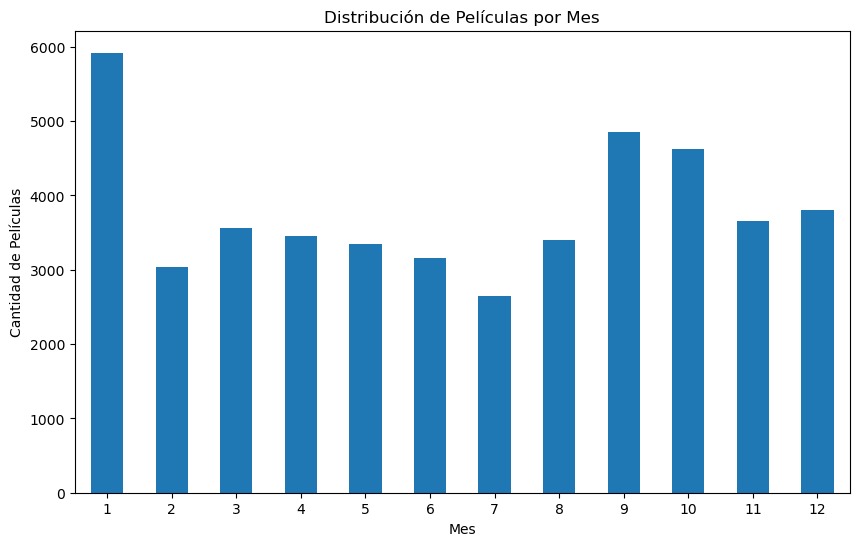

In [37]:
# Convierte la columna 'release_date' a tipo de dato datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extrae el mes y el año de lanzamiento en columnas separadas
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year

# Análisis de la distribución de películas por mes
plt.figure(figsize=(10, 6))
df['release_month'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribución de Películas por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Películas")
plt.xticks(rotation=0)
plt.show()

In [24]:
# Expandimos la lista de nombres de generos
generos_expandidos = df['genres'].explode()
conteo_generos = generos_expandidos.value_counts()
conteo_generos = conteo_generos[conteo_generos > 1]

In [25]:
print(f"Suma de valores únicos:\n{conteo_generos}")

Suma de valores únicos:
Drama              20302
Comedy             13195
Thriller            7635
Romance             6744
Action              6603
Horror              4676
Crime               4312
Documentary         3926
Adventure           3506
Science Fiction     3054
Family              2774
Mystery             2474
Fantasy             2322
Animation           1942
Foreign             1627
Music               1600
History             1397
War                 1325
Western             1042
TV Movie             768
Name: genres, dtype: int64


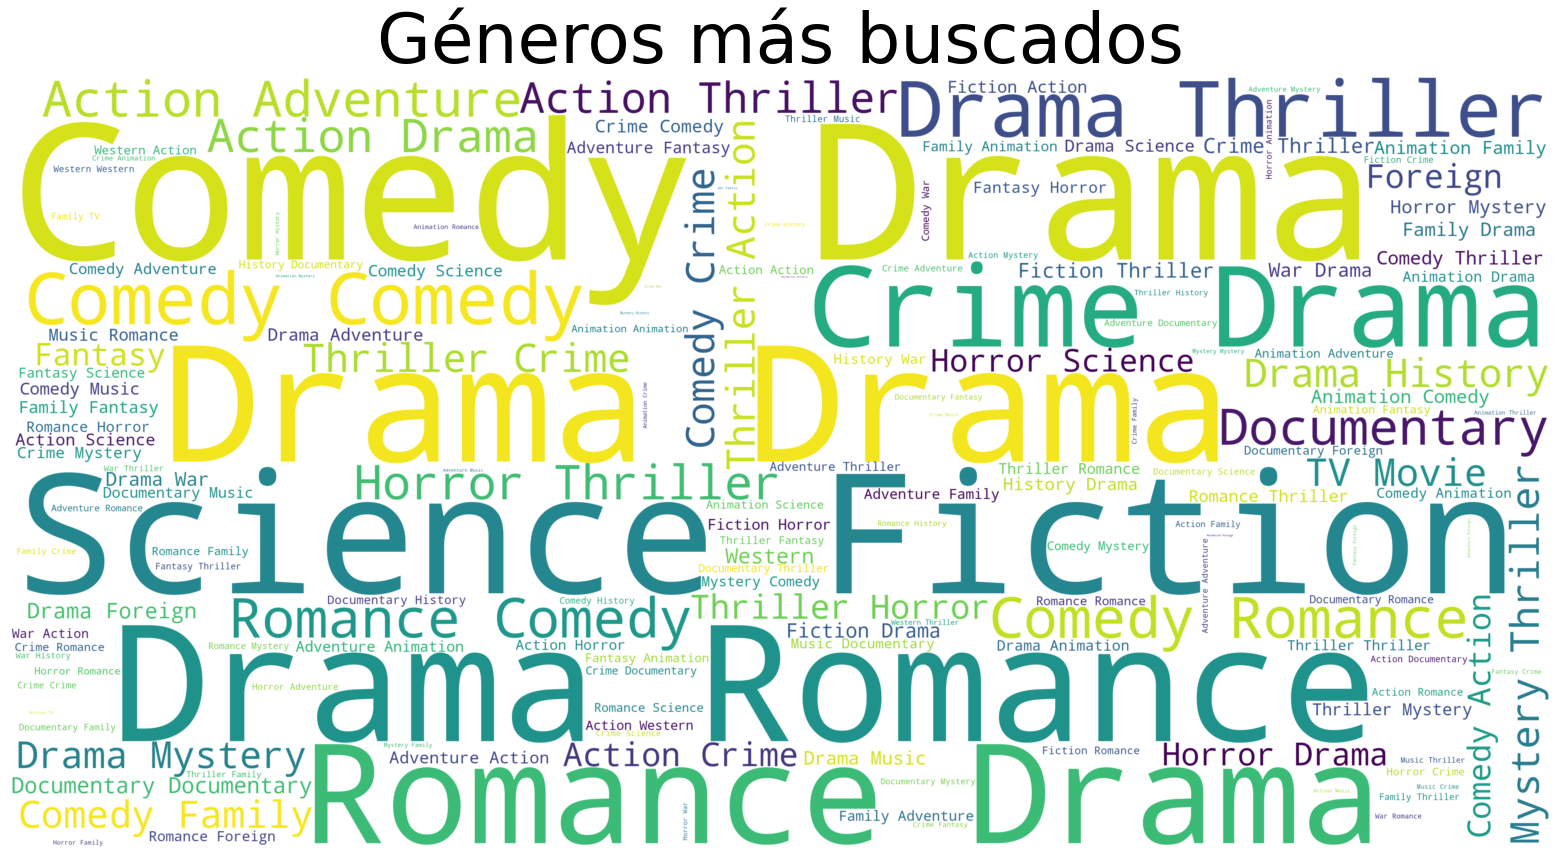

In [40]:
# Concatenar todas las listas de géneros en un solo texto
all_genres = ' '.join(','.join(genre) for genre in df['genres'])

# Crear la nube de palabras
Nube_Generos = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(all_genres)

# Visualizar la nube de palabras
plt.figure(figsize=(20, 10))
plt.title('Géneros más buscados', fontsize=50)
plt.imshow(Nube_Generos, interpolation='bilinear')
plt.axis('off')
plt.show()

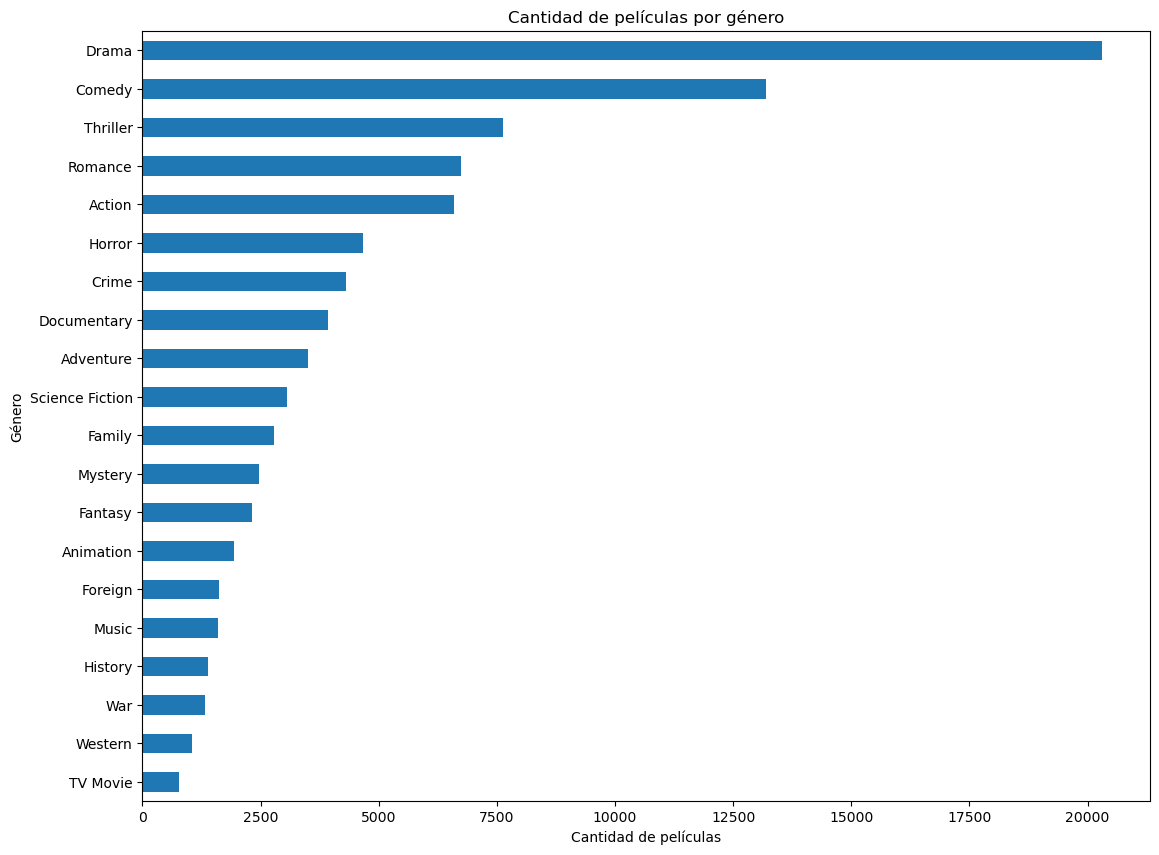

In [35]:
# Grafico para ver la cantidad de peliculas por genero
conteo_generos = conteo_generos.sort_values()  # Ordenamos los generos por cantidad de peliculas

plt.figure(figsize=(13,10)) 
conteo_generos.plot(kind='barh')  # Creamos un grafico de barras horizontales
plt.title('Cantidad de películas por género')  # Añadimos un título al gráfico
plt.xlabel('Cantidad de películas')  # Añadimos un título al eje x
plt.ylabel('Género')  # Añadimos un título al eje y
plt.show()  # Mostramos el gráfico

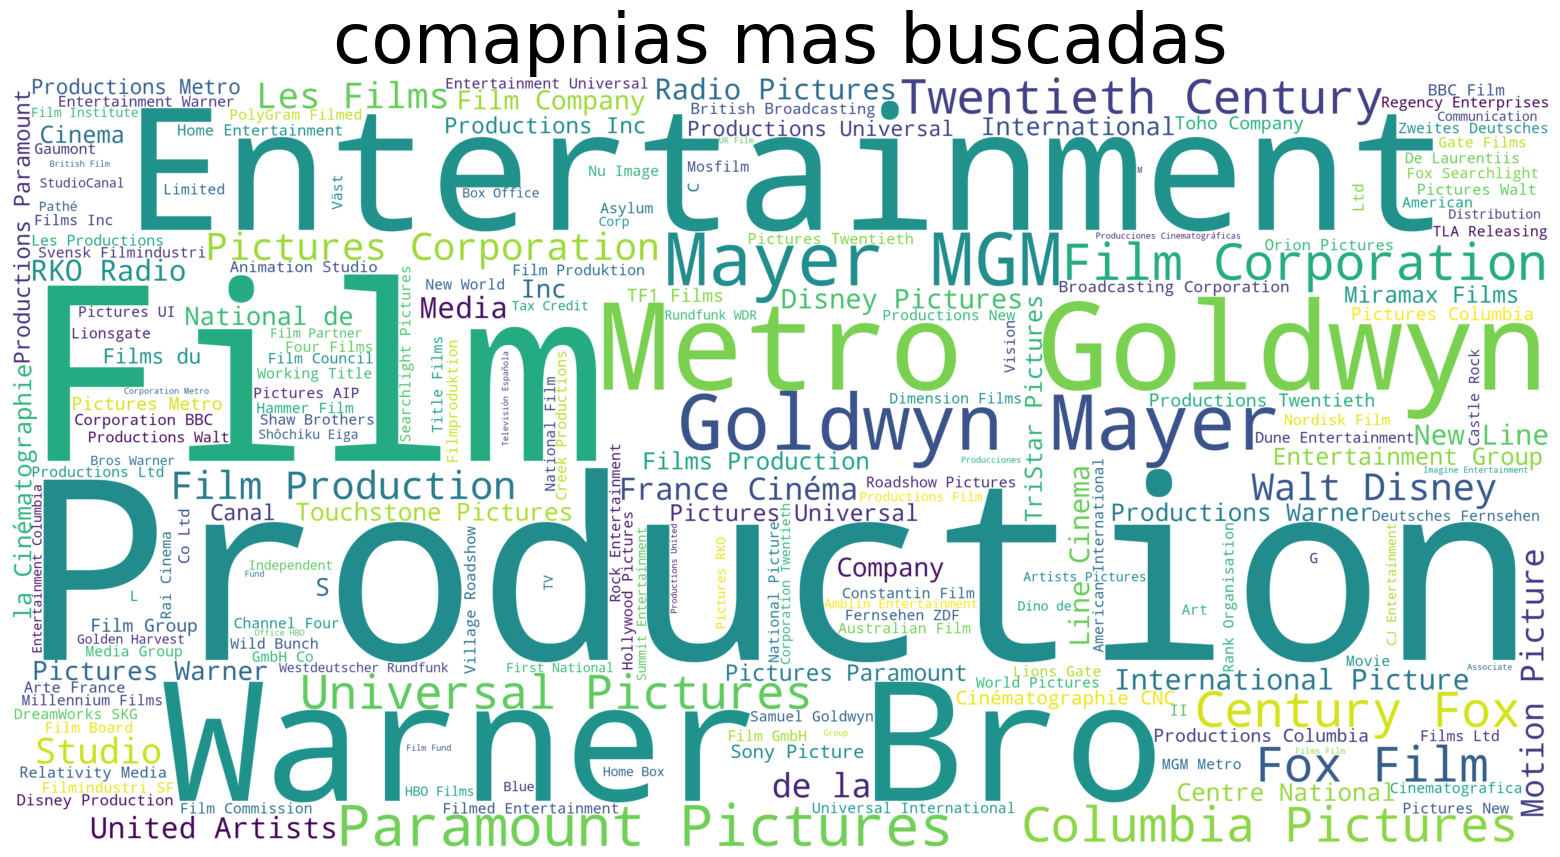

In [26]:
all_production_companies = ' '.join(','.join(companies) for companies in df['production_companies'])

# Crear la nube de palabras
Nube_Generos = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(all_production_companies)

# Visualizar la nube de palabras
plt.figure(figsize=(20, 10))
plt.title('comapnias mas buscadas', fontsize=50)
plt.imshow(Nube_Generos, interpolation='bilinear')
plt.axis('off')
plt.show()

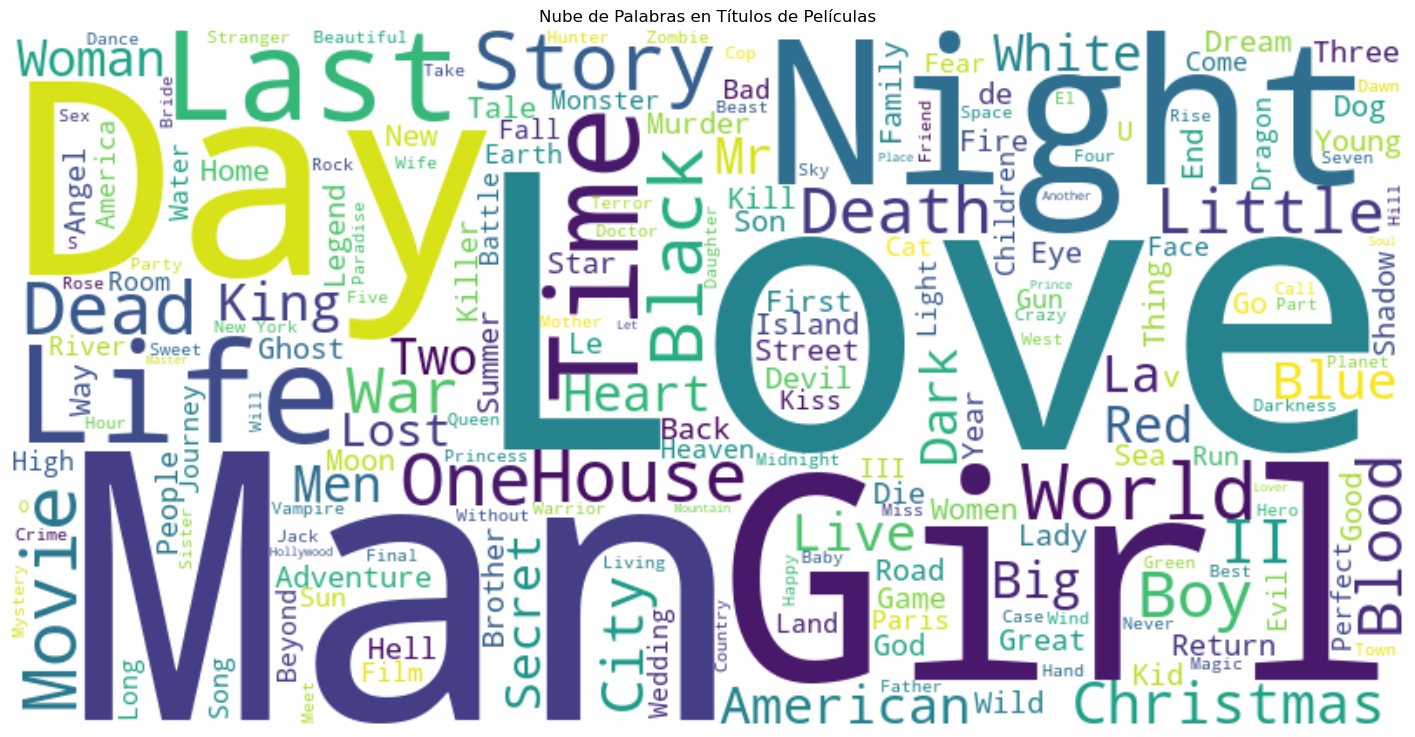

In [34]:
# Eliminar filas con valores faltantes en la columna 'overview'
df = df.dropna(subset=['title'])

# Convertir la columna 'title' en un corpus de títulos
titles_corpus = " ".join(title for title in df['title'] if isinstance(title, str))

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_corpus)

# Visualizar la WordCloud
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Nube de Palabras en Títulos de Películas")
plt.axis('off')
plt.show()

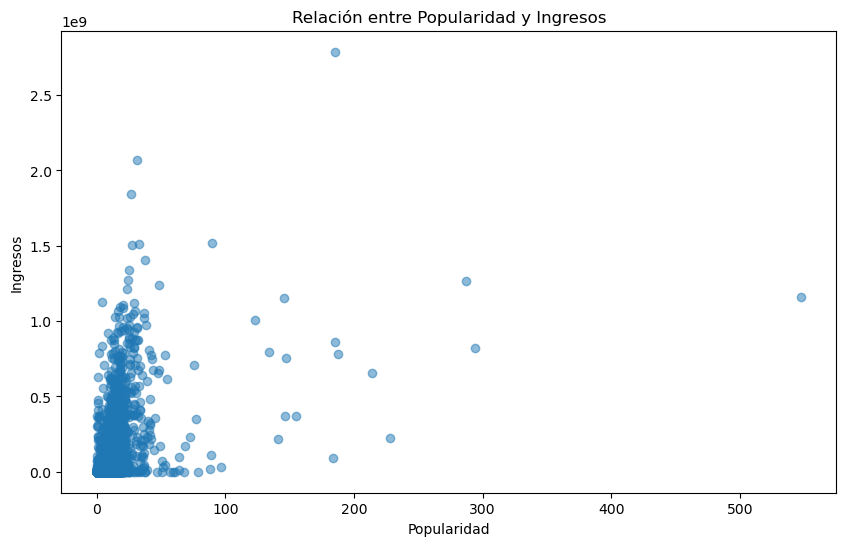

In [30]:
# "popularity" vs "revenue"
plt.figure(figsize=(10, 6))
plt.scatter(df['popularity'], df['revenue'], alpha=0.5)
plt.title("Relación entre Popularidad y Ingresos")
plt.xlabel("Popularidad")
plt.ylabel("Ingresos")
plt.show()

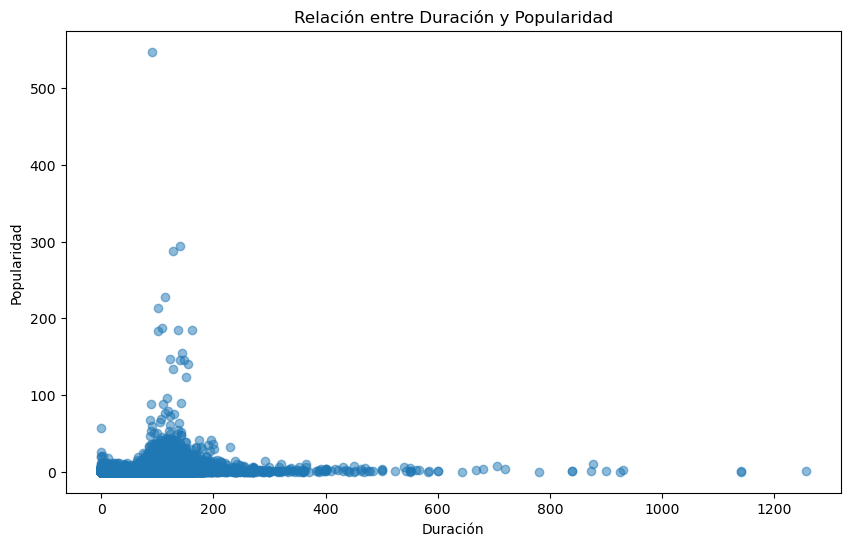

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime'], df['popularity'], alpha=0.5)
plt.title("Relación entre Duración y Popularidad")
plt.xlabel("Duración")
plt.ylabel("Popularidad")
plt.show()

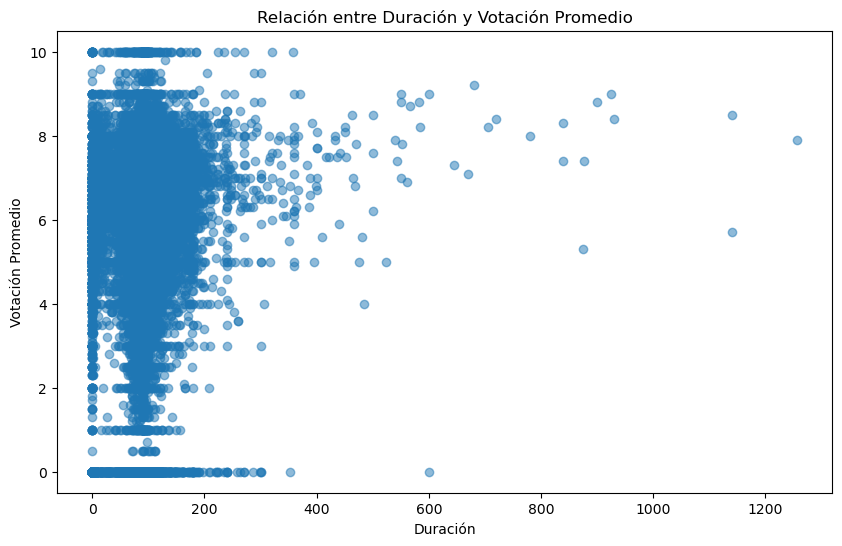

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime'], df['vote_average'], alpha=0.5)
plt.title("Relación entre Duración y Votación Promedio")
plt.xlabel("Duración")
plt.ylabel("Votación Promedio")
plt.show()

C:\Users\Pavilion HP\AppData\Local\Temp\ipykernel_5724\821533667.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


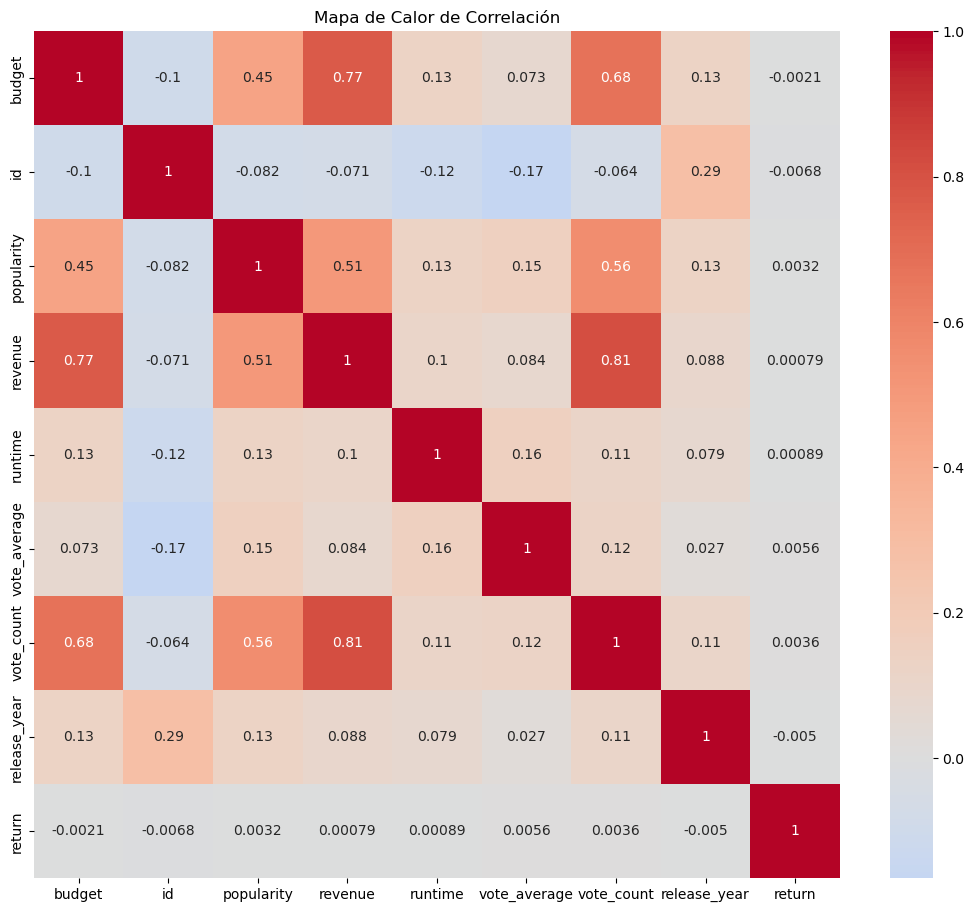

In [33]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(13, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de Correlación")
plt.show()